# Put Your Data in a Box
---

#### Josh Reed

Technical Development Lead  
Algolux

_Montréal-Python 75_  
_June 26, 2019_

- github: [@jriddy](https://github.com/jriddy/)
- linkedin: [Josh Reed](https://www.linkedin.com/in/josh-reed-3469383a/)

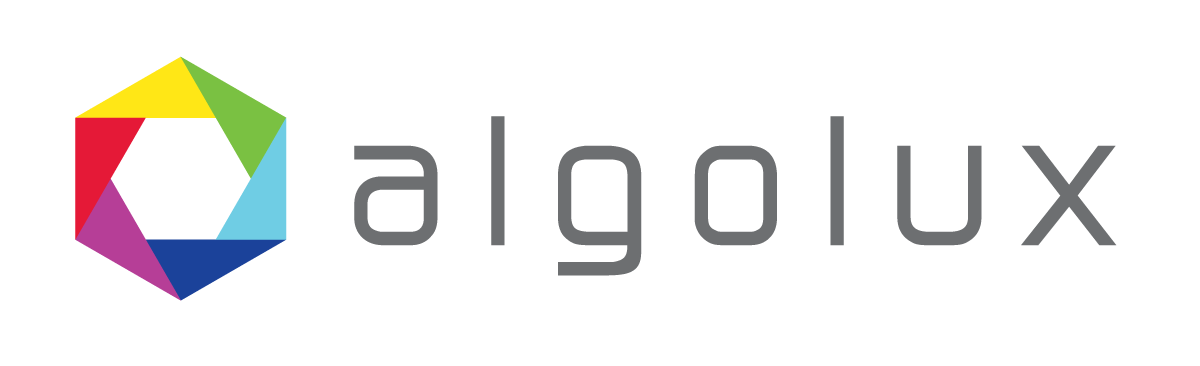

_Driving safety in autonomous vision_

Algolux specializes in providing vision and imaging solutions for clients in the automotive, robotics, and security industries, with two main products:

- **EOS** - an award-winning NN stack focusing on object detection in all conditions
- **ATLAS** - an automation suite for tuning and bringing digital camera systems to market



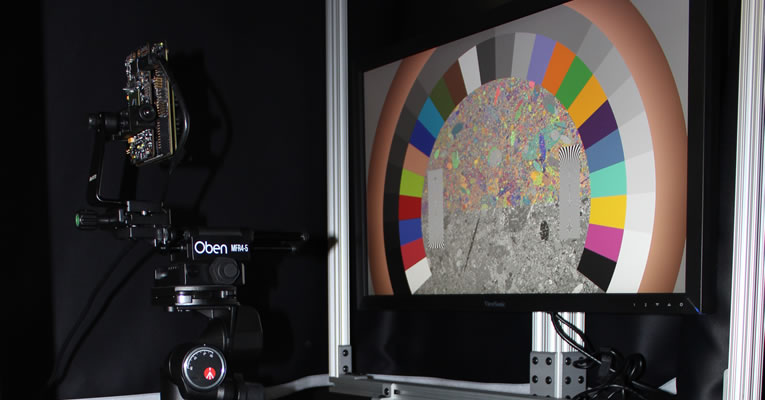

We use a ton of Python code, for research and application development.  And we're always looking for good...

- Python developers
- Embedded software developers
- Imaging researchers
- ML researchers



...so if you want to know more about us, come talk to me afterwards.

Or visit us at [algolux.com](https://algolux.com).

## Python has a problem

Some of its features are so good that it encourages some bad things.

### Convenient general-purpose data structures

The combination of

* tuples
* lists
* dicts

is enough to get 90% of what you need done in common programming tasks, and they are there waiting for you, right out of the gate.

This isn't something you take for granted if you've worked with some other common programming languages.  Even some basic things, like returning multiple values from a function can be akward or at least verbose in some other languages.

### C: structs

```c
typedef struct endpoint {
    char host[128];
    unsigned int port;
} endpoint;

endpoint host_and_port() {
    endpoint ep = { "localhost", 7777 };
    return ep;
}
```

```c
#include <stdio.h>

int main() {
    endpoint ep = host_and_port();
    printf("host: %s, port: %d\n", ep.host, ep.port);
}
```

### Java: classes

```java
final class Endpoint {
    private String host;
    private int port;

    public Endpoint(String host, int port) { setHost(host); setPort(port); }
    public String getHost() { return host; }
    public void setHost(String host) { this.host = host; }
    public int getPort() { return port; }
    public void setPort(int port) { this.port = port; }
}
```

```java
public class ShowEndpoint {
    private static Endpoint hostAndPort() {
        return new Endpoint("localhost", 2345);
    }

    public static void main(String[] args) {
        Endpoint ep = hostAndPort();
        System.out.format("host: %s, port: %d", ep.getHost(), ep.getPort());
    }
}
```

### Python: tuples

* Tuples provide a great way to group together related data quickly and succinctly

In [1]:
host = 'localhost'
port = 8888
endpoint = (host, port)

* Unpacking assignment makes this a convenient way to have multiple return values

In [2]:
from typing import Tuple

def parse_endpoint(s: str) -> Tuple[str, int]:
    host, port_str = s.rsplit(':', 1)
    port = int(port_str)
    return host, port

host, port = parse_endpoint('localhost:5678')
host, port

('localhost', 5678)

### Python: dicts

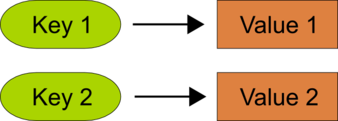

Arguably, the dict is the most important data structure in Python. Things that are dicts:

- classes and objects
- modules
- globals
- locals become a dict when you ask for them with `locals()`

### Internal Dict Usage

In [3]:
class EmptyClass: ...

ec = EmptyClass()
ec.__dict__

{}

In [4]:
EmptyClass.__dict__

mappingproxy({'__module__': '__main__',
              '__dict__': <attribute '__dict__' of 'EmptyClass' objects>,
              '__weakref__': <attribute '__weakref__' of 'EmptyClass' objects>,
              '__doc__': None})

In [5]:
import example_mod
example_mod.__dict__

{'__name__': 'example_mod',
 '__doc__': None,
 '__package__': '',
 '__loader__': <_frozen_importlib_external.SourceFileLoader at 0x7ffa74eae0b8>,
 '__spec__': ModuleSpec(name='example_mod', loader=<_frozen_importlib_external.SourceFileLoader object at 0x7ffa74eae0b8>, origin='/home/jreed/devel/pydiab/example_mod.py'),
 '__file__': '/home/jreed/devel/pydiab/example_mod.py',
 '__cached__': '/home/jreed/devel/pydiab/__pycache__/example_mod.cpython-36.pyc',
 '__builtins__': {'__name__': 'builtins',
  '__doc__': "Built-in functions, exceptions, and other objects.\n\nNoteworthy: None is the `nil' object; Ellipsis represents `...' in slices.",
  '__package__': '',
  '__loader__': _frozen_importlib.BuiltinImporter,
  '__spec__': ModuleSpec(name='builtins', loader=<class '_frozen_importlib.BuiltinImporter'>),
  '__build_class__': <function __build_class__>,
  '__import__': <function __import__>,
  'abs': <function abs(x, /)>,
  'all': <function all(iterable, /)>,
  'any': <function any(iterable

### Dictionary use case

Let's say we want to load some information in tablular form...well a dictionary seems like a perfect tool for this!

In [6]:
import csv

with open('addresses.csv', 'r') as file:
    raw_addresses = list(csv.DictReader(file))

raw_addresses

[OrderedDict([('First_NAME', 'John'),
              ('last_NAME', 'Doe'),
              ('Street', '120 jefferson st.'),
              ('city', 'Riverside'),
              ('STATE', ' NJ'),
              ('zip', ' 08075')]),
 OrderedDict([('First_NAME', 'Jack'),
              ('last_NAME', 'McGinnis'),
              ('Street', '220 hobo Av.'),
              ('city', 'Phila'),
              ('STATE', ' PA'),
              ('zip', '09119')]),
 OrderedDict([('First_NAME', 'John "Da Man"'),
              ('last_NAME', 'Repici'),
              ('Street', '120 Jefferson St.'),
              ('city', 'Riverside'),
              ('STATE', ' NJ'),
              ('zip', '08075')]),
 OrderedDict([('First_NAME', 'Stephen'),
              ('last_NAME', 'Tyler'),
              ('Street', '7452 Terrace "At the Plaza" road'),
              ('city', 'SomeTown'),
              ('STATE', 'SD'),
              ('zip', ' 91234')]),
 OrderedDict([('First_NAME', ''),
              ('last_NAME', 'Blankman'),
 

### Cleanup

One of the better usecases of dictionaries is being able to do similar operations on a collection of data.

In this case, we'll use a nice couple of comprehensions to massage our data into something more readable:

In [7]:
cleaned_addresses = [
    {k.lower(): v.strip() for k, v in rec.items()}
    for rec in raw_addresses
]
cleaned_addresses

[{'first_name': 'John',
  'last_name': 'Doe',
  'street': '120 jefferson st.',
  'city': 'Riverside',
  'state': 'NJ',
  'zip': '08075'},
 {'first_name': 'Jack',
  'last_name': 'McGinnis',
  'street': '220 hobo Av.',
  'city': 'Phila',
  'state': 'PA',
  'zip': '09119'},
 {'first_name': 'John "Da Man"',
  'last_name': 'Repici',
  'street': '120 Jefferson St.',
  'city': 'Riverside',
  'state': 'NJ',
  'zip': '08075'},
 {'first_name': 'Stephen',
  'last_name': 'Tyler',
  'street': '7452 Terrace "At the Plaza" road',
  'city': 'SomeTown',
  'state': 'SD',
  'zip': '91234'},
 {'first_name': '',
  'last_name': 'Blankman',
  'street': '',
  'city': 'SomeTown',
  'state': 'SD',
  'zip': '00298'},
 {'first_name': 'Joan "the bone", Anne',
  'last_name': 'Jet',
  'street': '9th, at Terrace plc',
  'city': 'Desert City',
  'state': 'CO',
  'zip': '00123'}]

### Providing access to this data

Now that we have some data and it does't look half bad, let's build a function for our users:

In [8]:
from typing import Iterable

def get_addresses_by_state(state: str) -> Iterable[dict]:
    return [a for a in cleaned_addresses if a['state'] == state]

get_addresses_by_state('NJ')

[{'first_name': 'John',
  'last_name': 'Doe',
  'street': '120 jefferson st.',
  'city': 'Riverside',
  'state': 'NJ',
  'zip': '08075'},
 {'first_name': 'John "Da Man"',
  'last_name': 'Repici',
  'street': '120 Jefferson St.',
  'city': 'Riverside',
  'state': 'NJ',
  'zip': '08075'}]

### WHOA!

You just handed a user a big ol' smelly bag of data.

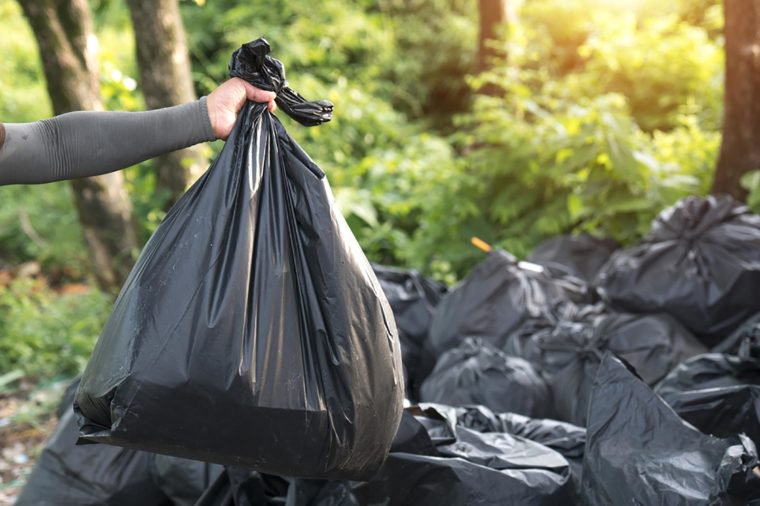

_Wait what?_

Yes, at an API boundary, using a general-purpose data structure for a special purpose bit of data is just like passing your garbage around.

### Why is this bad?

- No semantics

- Difficult to communicate changes

- Exports complexity, rather than managing it

- Users are completely reliant on documentation you probably won't write

### The alternative

The alternative is to put your data in a box!

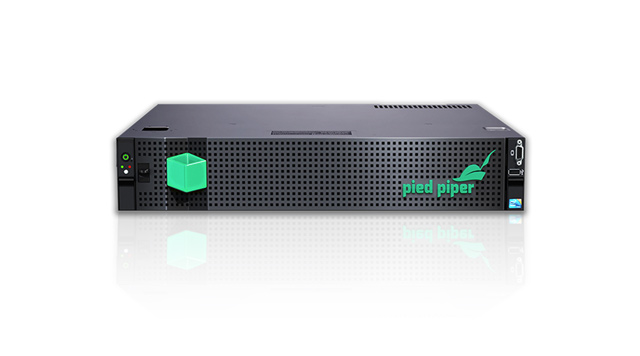

Well, not that kind of box.  But I do mean a purpose-built container for your data!

### Boxes == Objects

In Python, there is really only one method of code organization for data, and that's objects, and the classes that define their layout.

Let's see what that looks like for our address type:

In [9]:
class AddressRecordByHand:
    def __init__(self, first_name, last_name, street, city, state, zip):
        self.first_name = first_name
        self.last_name = last_name
        self.street = street
        self.city = city
        self.state = state
        self.zip = zip
        
arbh = AddressRecordByHand(**cleaned_addresses[0])
arbh

Okay, well that's a lot of typing for...well not much really other than just having an object.

It even lacks some features dicts have like printing and equality.

### Introducing attrs

Fortunately the excellent [attrs](https://www.attrs.org/en/stable/) library is here to help.

- It gives us back the joy of writing classes
- ...without sacrifcing features 
- ...while helping us maintain correctness
- ...and it doesn't slow down code

And it's just one `pip install attrs` away from any project you have!

### Address with attrs

In [10]:
import attr

@attr.s
class AddressRecord:
    first_name = attr.ib()
    last_name = attr.ib()
    street = attr.ib()
    city = attr.ib()
    state = attr.ib()
    zip = attr.ib()
    
ar = AddressRecord(**cleaned_addresses[1])
ar

AddressRecord(first_name='Jack', last_name='McGinnis', street='220 hobo Av.', city='Phila', state='PA', zip='09119')

In [11]:
# or if you want to annotate all of them and are on python 3.6+

@attr.s(auto_attribs=True)
class AddressRecord:
    first_name: str
    last_name: str
    street: str
    city: str
    state: str
    zip: str
    
ar = AddressRecord(**cleaned_addresses[1])
ar

AddressRecord(first_name='Jack', last_name='McGinnis', street='220 hobo Av.', city='Phila', state='PA', zip='09119')

### Boxes are better

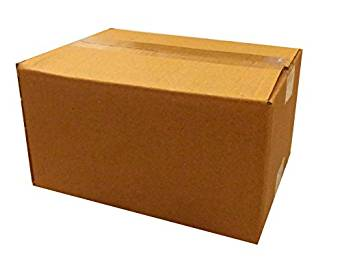

When companies ship things, they put them in boxes, because the logistics are easier to manage.

When you move, you put your stuff in boxes, because it's easier to stack and handle them.

And when you return data to consumers of your API, you put it in boxes so they can deal with it.

And `attrs` makes it so easy you don't have an excuse not to.

## What do we gain?

### Attrs features

- No more hand writing `__init__` methods!

- Simple, obvious `__repr__` (because `<MyClass at 0xab4223c>` is ugly and useless)

- All rich comparison methods defined (without `functools.total_ordering`)

- Data defaults, conversion, and validation

- Optionally frozen types, which can also be hashable!

- Support for arbitrary metadata

### Semantics

One of the biggest gains is that we imbue our data with semantics. This is how we put the "language" in "programming language".

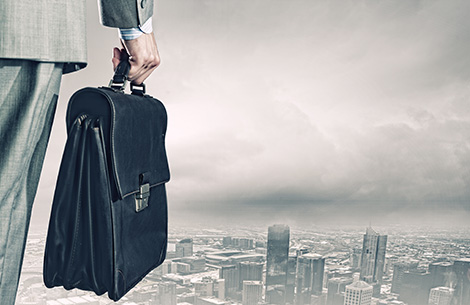

Adding names semantics to our data gives us a handle we can hold onto mentally.

This richer vocabulary helps us analyze problems better by understanding boundaries between concepts more thoroughly.

### Change management

When you change information in a dictionary used as a record, everyone and everything that touches the data has to deal with it.

What if we added a field to our record type?

In [12]:
# if we used a dict we're gonna see a lot of this all over the place

record = cleaned_addresses[3]
if 'country' in record:
    print(record['country'])

In [13]:
# same thing with attrs:

@attr.s(auto_attribs=True)
class InternationalAddressRecord:
    first_name: str
    last_name: str
    street: str
    city: str
    state: str
    zip: str
    country: str = 'US'
    
usar = InternationalAddressRecord(**cleaned_addresses[1])
usar.country  # no need to do an `if`, I know that it's always valid

'US'

With a single source of truth about our data, we're able to consistently know what it will look like.

### Containing complexity through maintaining invariants

Custom objects give us a point where we can maintain _invariants_, which are simply _things that should always be true_.

Enforcing strong invariants means we _never allow invalid data to exist_.

This frees of from the tyranny of always having to guess when data is okay.

In [14]:
@attr.s(auto_attribs=True, frozen=True)
class FrozenAddressRecord:
    first_name: str
    last_name: str
    street: str
    city: str
    state: str = attr.ib()
    zip: str = attr.ib()
    
    @state.validator
    def _state_validator(self, _attrib, value):
        if not (len(value) == 2 and all(c.isupper() for c in value)):
            raise ValueError(f"{value!r} is not a valid state!")
    
    @zip.validator
    def _zip_validator(self, _attrib, value):
        if not (len(value) == 5 and all(c.isdigit() for c in value)):
            raise ValueError(f"{value!r} is not a valid zip!")


In [15]:
import traceback

adict = cleaned_addresses[4].copy()
adict['state'] = 'sky'
try:
    FrozenAddressRecord(**adict)
except Exception:
    traceback.print_exc()

Traceback (most recent call last):
  File "<ipython-input-15-8c8b6b23b120>", line 6, in <module>
    FrozenAddressRecord(**adict)
  File "<attrs generated init 2a14671b16db37c05991e9d75e7b08591fdbca3d>", line 10, in __init__
    __attr_validator_state(self, __attr_state, self.state)
  File "<ipython-input-14-d98a78bd6ea7>", line 13, in _state_validator
    raise ValueError(f"{value!r} is not a valid state!")
ValueError: 'sky' is not a valid state!


### Natural place for documentation

Unlike ad-hoc shared types, we have a natural place to put our documentation, if it's needed.

Sometimes the process of just picking names is enough.

Other times, we need more:

In [16]:
@attr.s(frozen=True, slots=True)
class DocumentedAddressRecord:
    """
    This object represents a US-only address.
    
    International addresses are handled by :class:`InternationalAddressRecord`.
    
    TODO: implement validators.
    """
    first_name = attr.ib(type=str)
    last_name: str
    street: str
    city: str
    state: str
    zip: str

## Features

#### Commitments

* Consise code
* Doesn't slow anything down
* Always just get regular classes

#### Upcoming core features

* Improved support for numpy and pandas (customized comparison mostly)
* More easily customizable repr

#### Ecosystem

* https://github.com/python-attrs/attrs/wiki/Extensions-to-attrs
* https://github.com/jriddy/zerial

## Further Reading

* https://www.attrs.org/en/stable/
* https://www.attrs.org/en/stable/why.html
* https://glyph.twistedmatrix.com/2016/08/attrs.html